### Student Information
Name:Nichaporn Bunyakaranun

Student ID:109065431

GitHub ID:109065431

Kaggle name:samoyed

Kaggle private scoreboard snapshot:
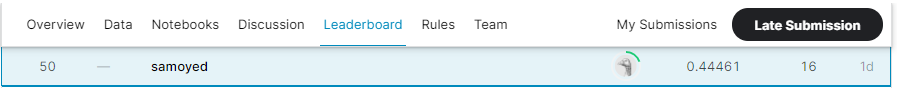

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---
## 1. Data Preparation

### 1.1 Load data

In [1]:
### Begin Assignment Here

# Load dataset
# Loop through each tweet in the JSON file and append it to a list
import json

tweet = []
for line in open('tweets_DM.json', 'r'):
    tweet.append(json.loads(line))

# View a single tweet in the list.
tweet[:3]

[{'_score': 391,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['Snapchat'],
    'tweet_id': '0x376b20',
    'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
  '_crawldate': '2015-05-23 11:42:47',
  '_type': 'tweets'},
 {'_score': 433,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
    'tweet_id': '0x2d5350',
    'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}},
  '_crawldate': '2016-01-28 04:52:09',
  '_type': 'tweets'},
 {'_score': 232,
  '_index': 'hashtag_tweets',
  '_source': {'tweet': {'hashtags': ['bibleverse'],
    'tweet_id': '0x28b412',
    'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'}},
  '_crawldate': '2017-12-25 04:39:20',
  '_type': 'tweets'}]

In [2]:
# Build dataframe
import pandas as pd 
df = pd.json_normalize(tweet)
df

,_score,_index,_crawldate,_type,_source.tweet.hashtags,_source.tweet.tweet_id,_source.tweet.text
0,391,hashtag_tweets,2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [3]:
# Select and rename columns : '_source.tweet.tweet_id', '_source.tweet.text'
text = df[['_source.tweet.tweet_id', '_source.tweet.text']].rename(columns={'_source.tweet.tweet_id': 'tweet_id', '_source.tweet.text': 'text'})
text

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [5]:
# Load emotion.csv file into dataframe
emotion = pd.read_csv('emotion.csv')
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [6]:
# Load data_identification.csv file into dataframe
identification = pd.read_csv('data_identification.csv')
identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [7]:
# separate train data 
iden_train = identification[identification['identification'] == 'train']

# Merge tweet_id & text & emotion for train_df
train_df = pd.merge(text, iden_train, how='inner', on=['tweet_id'])
train_df = pd.merge(train_df, emotion, how='inner', on=['tweet_id'])
train_df

,tweet_id,text,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,there's currently two girls walking around the...,train,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [8]:
# separate test data 
iden_test = identification[identification['identification'] == 'test']

# Merge tweet_id & text for test_df
test_df = pd.merge(text, iden_test, how='inner', on=['tweet_id'])
test_df

,tweet_id,text,identification
0,0x28b412,"Confident of your obedience, I write to you, k...",test
1,0x2de201,"""Trust is not the same as faith. A friend is s...",test
2,0x218443,When do you have enough ? When are you satisfi...,test
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
4,0x26289a,"In these tough times, who do YOU turn to as yo...",test
...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",test
411968,0x2a980e,"""There is a lad here, which hath five barley l...",test
411969,0x316b80,When you buy the last 2 tickets remaining for ...,test
411970,0x29d0cb,I swear all this hard work gone pay off one da...,test


In [9]:
#Count missing value in training_df
train_df.isnull().sum(axis = 0)

tweet_id          0
text              0
identification    0
emotion           0
dtype: int64

In [10]:
#Count duplicated value in training_df
sum(train_df.duplicated())

0

In [11]:
#Count missing value in test_df
train_df.isnull().sum(axis = 0)

tweet_id          0
text              0
identification    0
emotion           0
dtype: int64

In [12]:
#Count duplicated value in test_df
sum(train_df.duplicated())

0

In [13]:
# We will use 50% of data to train & test model
# Shuffle dataset

train_df = train_df.sample(frac=0.5)
test_df = test_df.sample(frac=1)

In [14]:
train_df

,tweet_id,text,identification,emotion
926365,0x27533f,The key to the #missionary’s work is the autho...,train,anticipation
637668,0x2d9b98,"... the Beginning of the creation of God, says...",train,anticipation
700196,0x2d4492,Some things God works miracles in Amen! <LH> #...,train,anticipation
102345,0x380c4d,Kate says she's going down that hatch 😧👀 <LH>,train,surprise
1450496,0x2e8530,I just heard a bobwhite for the first time in ...,train,joy
...,...,...,...,...
181570,0x2ef899,"@deadskulltweets oh Paul, I cried the angriest...",train,anger
1104999,0x36fd03,@FoxyOnYourRadio is there any other reason to ...,train,joy
176518,0x326775,Spring Special!! 10% off your next course for ...,train,joy
399288,0x372997,just finished watching the 1st EP of <LH> and ...,train,fear


In [15]:
test_df

,tweet_id,text,identification
57660,0x32c585,@realDonaldTrump WTF is wrong with you? My ca...,test
137206,0x247c40,@abpnewshindi #operation200 u hide face of d w...,test
97846,0x36c2e3,"I LOVE LOVE LOVE Gigi, but try explaining to y...",test
49166,0x21fdb7,@Nandi_Madida @Afripopmag Go get your coins gi...,test
124029,0x31add9,Going to say something controversial right now...,test
...,...,...,...
109258,0x23f2fb,The LEFT have brought #racism back to at least...,test
338672,0x23ccd2,@SamsungHelpUK gearfit2 totally dead suddenly ...,test
138088,0x1da0dd,Im going to do great things... with or without...,test
349026,0x207807,Driving my new truck with a little George Stra...,test


In [16]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (727782, 4)
Shape of Testing df:  (411972, 3)


In [17]:
# Split train_df to train_data & test_data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_df[['tweet_id', 'text', 'emotion']], shuffle=True,test_size=0.3,random_state=0)

In [18]:
# See the shape after split
train_data.shape

(509447, 3)

In [19]:
test_data.shape

(218335, 3)

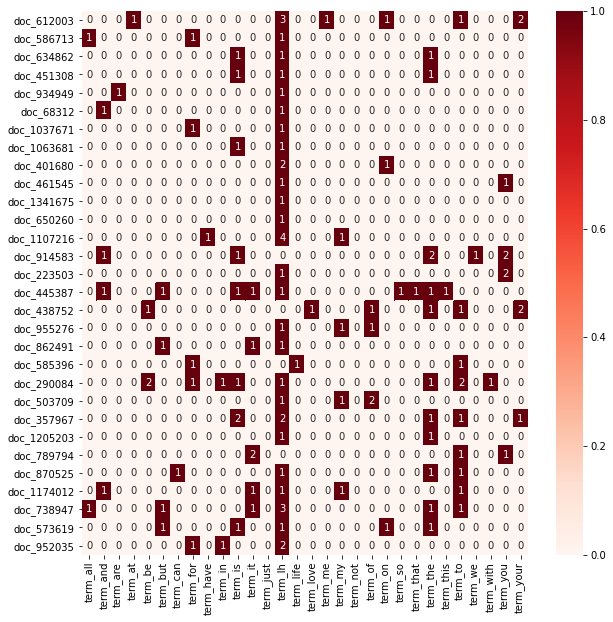

In [20]:
# Exploring word frequency for Top 30 words in train_data
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

count_vect = CountVectorizer(max_features=30)    
train_data_counts = count_vect.fit_transform(train_data.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(train_data.index)[0:30]]
plot_z = train_data_counts[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y, )
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="Reds",
                 vmin=0, vmax=1, annot=True)

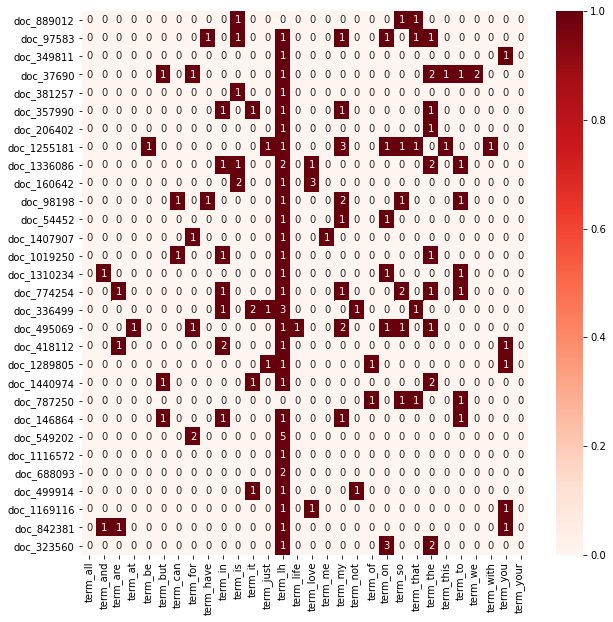

In [21]:
# Exploring word frequency for Top 30 words in test_data
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

count_vect = CountVectorizer(max_features=30)    
test_data_counts = count_vect.fit_transform(test_data.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y = ["doc_"+ str(i) for i in list(test_data.index)[0:30]]
plot_z = test_data_counts[0:30, 0:30].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y, )
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="Reds",
                 vmin=0, vmax=1, annot=True)

---
### 1.3 Save data

In [22]:
## save to pickle file
train_data.to_pickle("train_data.pkl") 
test_data.to_pickle("test_data.pkl")

In [23]:
import pandas as pd

## load a pickle file
train_data = pd.read_pickle("train_data.pkl")
test_data = pd.read_pickle("test_data.pkl")

In [24]:
test_data.shape

(218335, 3)

In [25]:
train_data.shape

(509447, 3)

---
### 1.4 Exploratory data analysis (EDA)

In [26]:
#group to find distribution
train_data.groupby(['emotion']).count()['text']

emotion
anger            14040
anticipation     86959
disgust          48375
fear             22387
joy             181029
sadness          67671
surprise         16982
trust            72004
Name: text, dtype: int64

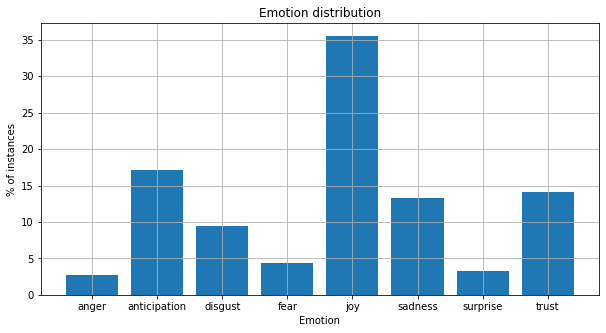

In [27]:
#group to find distribution in train_data
train_data.groupby(['emotion']).count()['text']

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_data['emotion'].unique()
post_total = len(train_data)
df1 = train_data.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

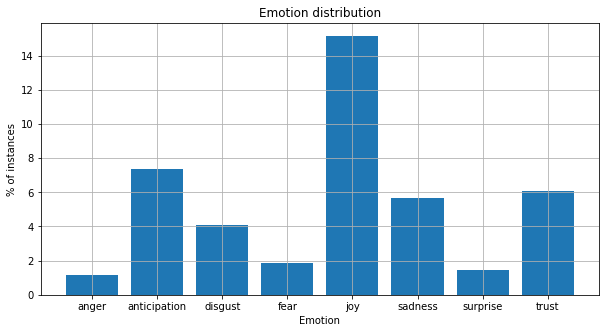

In [28]:
#group to find distribution in test_data
train_data.groupby(['emotion']).count()['text']

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = test_data['emotion'].unique()
post_total = len(train_data)
df1 = test_data.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

Notice that the distribution of train_data & test_data is similar

In [29]:
# Note** 
# I tried to clean data like stop word, changing to lower case, delete punctuaions etc., 
# but the result is not good enough comparing with unclean-data result. So, I decided to not use it.

In [30]:
# Regarding Decision Tree model tend to have overfitting model, therefore I did not use it.
# I also used XGBoost classifier model, but the result is not good like Multinomial Naive Bayes classifier model
# Below is the best model that has the best result and I submited to Kaggle.

## 2. Building model

### Multinomial Naive Bayes classifier model

### Feature engineering  --> Using TF-IDF + NLTK

In [31]:
# build analyzers
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
vectorizer_TFIDF = TfidfVectorizer(max_features=20000, tokenizer=nltk.word_tokenize, stop_words=None,ngram_range=(1,2))

# apply analyzer to training data
vectorizer_TFIDF.fit(train_data['text'])

train_data_TFIDF_features_20000 = vectorizer_TFIDF.transform(train_data['text'])

## check dimension
train_data_TFIDF_features_20000.shape

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(509447, 20000)

In [32]:
# observe some feature names
feature_names_TFIDF = vectorizer_TFIDF.get_feature_names()
feature_names_TFIDF[100:110]

['! wishing',
 '! wow',
 '! xx',
 '! yes',
 '! you',
 '! your',
 '! |',
 '! ”',
 '! ❤',
 '! ❤️']

### Model

In [33]:
# Build Multinomial Naive Bayes classifier model
from sklearn.naive_bayes import MultinomialNB


# Prepare training & testing data for classification
# Using "fit_transform" for training data, and "transform" for testing data since we need testing data to be completely new and surprising for the model
X_train = vectorizer_TFIDF.fit_transform(train_data['text'])
y_train = train_data['emotion']

X_test = vectorizer_TFIDF.transform(test_data['text'])
y_test = test_data['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (509447, 20000)
y_train.shape:  (509447,)
X_test.shape:  (218335, 20000)
y_test.shape:  (218335,)


In [34]:
NB_model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True, )

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'sadness', 'disgust', 'joy', 'joy', 'anticipation',
       'disgust', 'joy', 'joy'], dtype='<U12')

### Result evaluation

In [35]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.56
testing accuracy: 0.54


In [36]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.88      0.14      0.24      5961
anticipation       0.64      0.51      0.57     37640
     disgust       0.46      0.39      0.43     20759
        fear       0.78      0.28      0.42      9621
         joy       0.52      0.85      0.65     77227
     sadness       0.48      0.48      0.48     29012
    surprise       0.84      0.15      0.25      7275
       trust       0.65      0.25      0.36     30840

    accuracy                           0.54    218335
   macro avg       0.66      0.38      0.42    218335
weighted avg       0.58      0.54      0.52    218335



In [37]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[  823   240  1032    32  2392  1361     5    76]
 [    8 19180  1074   123 14200  2021    34  1000]
 [   41   644  8161   117  6978  4589    25   204]
 [    5   646   651  2720  4371  1063    19   146]
 [   16  4774  1618   186 65285  3025    59  2264]
 [   29   993  3407   160 10050 14001    34   338]
 [    5   299   881    77  3482  1372  1062    97]
 [    3  3072   815    67 17753  1479    19  7632]]


[[  823   240  1032    32  2392  1361     5    76]
 [    8 19180  1074   123 14200  2021    34  1000]
 [   41   644  8161   117  6978  4589    25   204]
 [    5   646   651  2720  4371  1063    19   146]
 [   16  4774  1618   186 65285  3025    59  2264]
 [   29   993  3407   160 10050 14001    34   338]
 [    5   299   881    77  3482  1372  1062    97]
 [    3  3072   815    67 17753  1479    19  7632]]


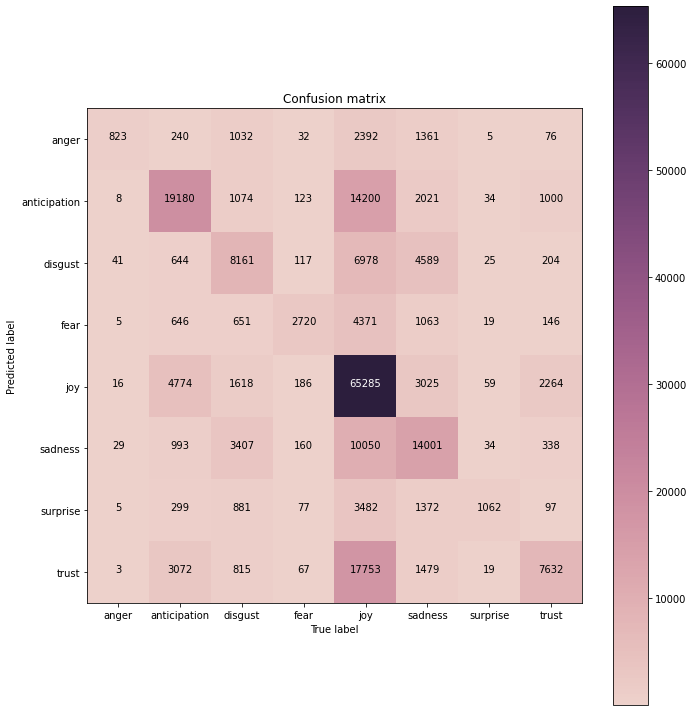

In [38]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## 3. Predict test data for submission

In [39]:
# Embeding text, then predict with the trained model.
X_test = vectorizer_TFIDF.transform(test_df['text'])   

# Use the model to make predictions
predict = NB_model.predict(X_test)    

# Observe the predixted result
predict[:10]

array(['disgust', 'disgust', 'joy', 'joy', 'sadness', 'fear', 'joy',
       'joy', 'joy', 'joy'], dtype='<U12')

## 4. Create CSV file for submission

In [40]:
# Create submission file
submission = pd.DataFrame({'id': test_df.tweet_id, 'emotion': predict})
submission.to_csv('submission.csv', index=False)